 # Predicting Heart Disease Using Machine Learning

#### This notebook looks into various Python-based machine learning and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## Approach:

* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## 1. Problem Definition:

In a Statement,

> Given Clinical parameters about a patient, can we predict whether or not they have heart disease or not?



## 2. Data

The Original Data Came from Cleveland data from UCI Machine Learning Repository. There is a verison available on kaggle:
https://archive.ics.uci.edu/dataset/45/heart+disease



## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.




## 4. Features

This is where you will get different information about each of the features of data. you can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert.

#### Create Data Dictionary

> Dataset columns:
* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
    1. Value 0: asymptomatic
    2. Value 1: atypical angina
    3. Value 2: non-anginal pain
    4. Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results
    1. Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    2. Value 1: normal
    3. Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping;
* ca: The number of major vessels (0–3)
* thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    1. Value 1: fixed defect (no blood flow in some part of the heart)
    2. Value 2: normal blood flow
    3. Value 3: reversible defect (a blood flow is observed but it is not normal)
* target: Heart disease (1 = no, 0= yes)


### Preparing the tools

We're going to use pandas, numpy and matplotlib for data analysis and manipulation.


In [3]:
# Import all the tools

# Regular EDA (Explorartory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [9]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kidn of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# Let's findout how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

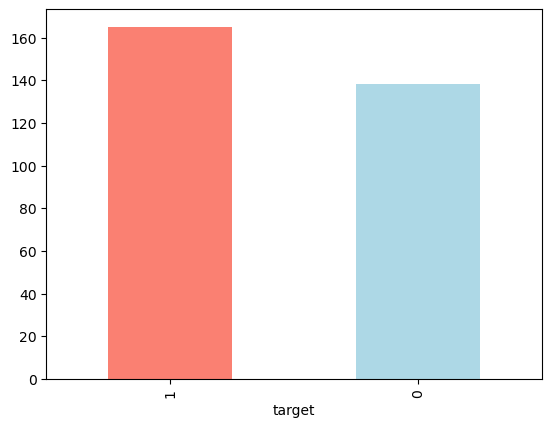

In [14]:
df['target'].value_counts().plot(kind="bar", color = ['salmon', 'lightblue'])

In [18]:
# Information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [20]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

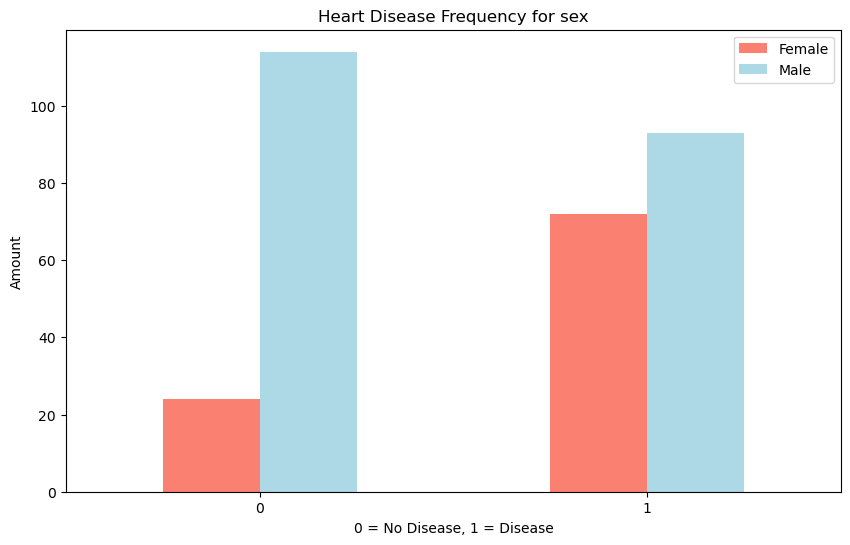

In [29]:
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

### Age vs. Max Heart Rate for Heart Disease



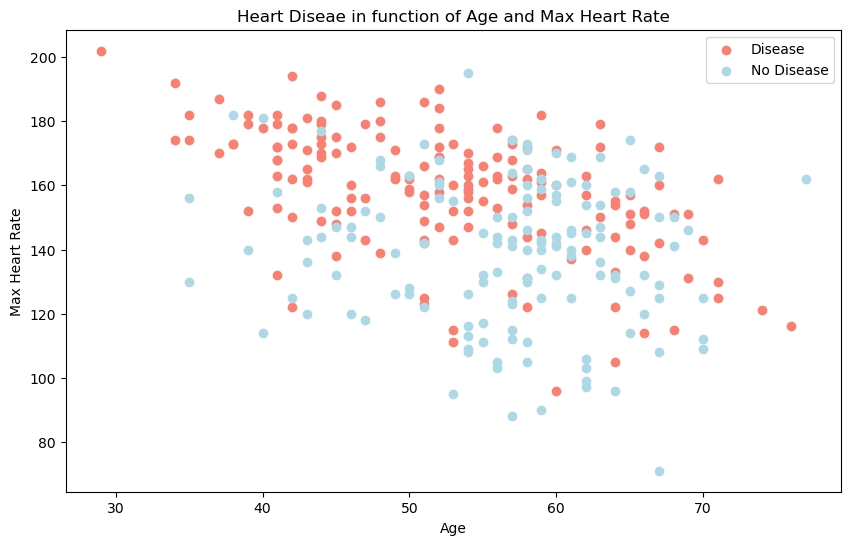

In [39]:
# Create another figure
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue")


# Add some helpful info

plt.title("Heart Diseae in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

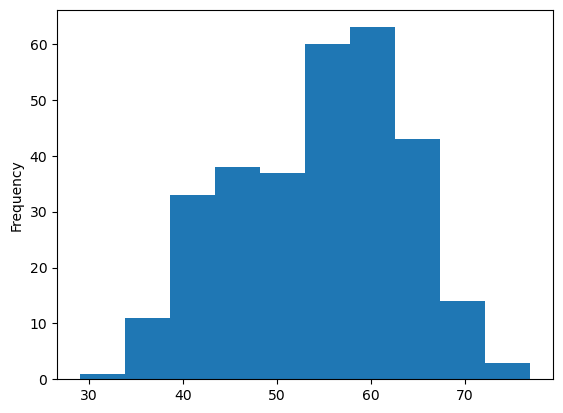

In [41]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency Per Chest Pain Type

cp: chest pain type
1. Value 0: asymptomatic
2. Value 1: atypical angina
3. Value 2: non-anginal pain
4. Value 3: typical angina

In [43]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

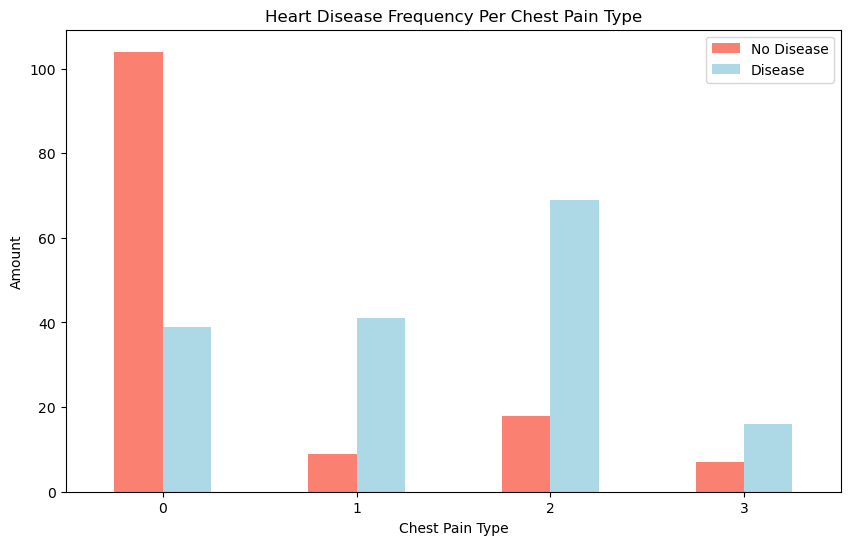

In [50]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                   color = ["salmon", "lightblue"])

# Add some informtion to the graph
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [179]:
# Make a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


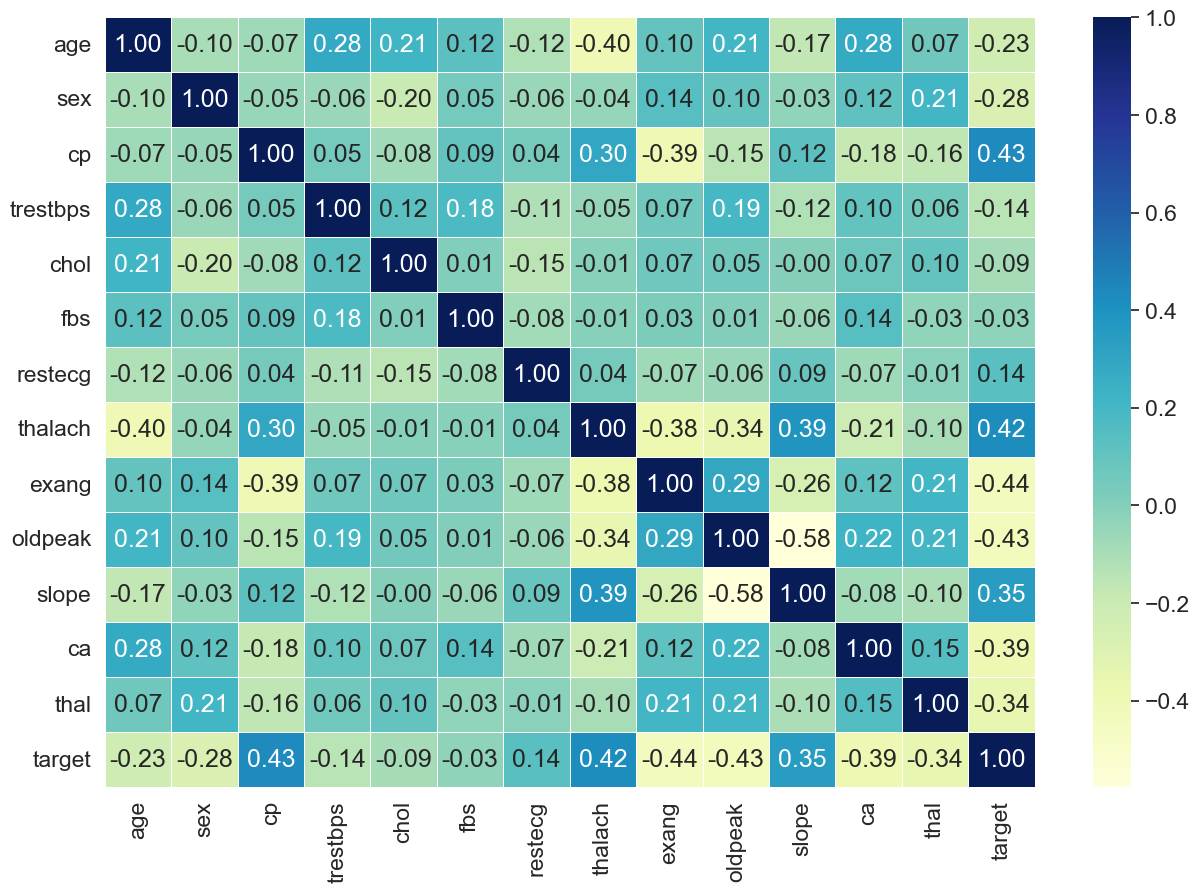

In [180]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

## 5. Modeling

In [60]:
# Split the data into X &  y
X = df.drop("target", axis = 1)
y = df['target']

In [64]:
df.shape, X.shape, y.shape

((303, 14), (303, 13), (303,))

In [65]:
# Split data into train and test sets

np.random.seed(40)

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

Now we've our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the pattern) on the training set.

Adnd We'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. LogisticRegression
2. RandomForestClassifier
3. K-Nearest Neighbours Classifier

In [87]:
# Put models in a dictionary 

models = {"Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier(),
          "KNN" : KNeighborsClassifier()}


# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluate given Machine Learning models.
    models: a dict of different scikit-Learn Machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random seed
    np.random.seed(40)
    #Make a dictionary to keep model scores
    model_scores = {}
    # Loop Through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores  

In [90]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/pavankumargaggera/Desktop/ML_COURSE/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.7049180327868853}

### Model Comparison

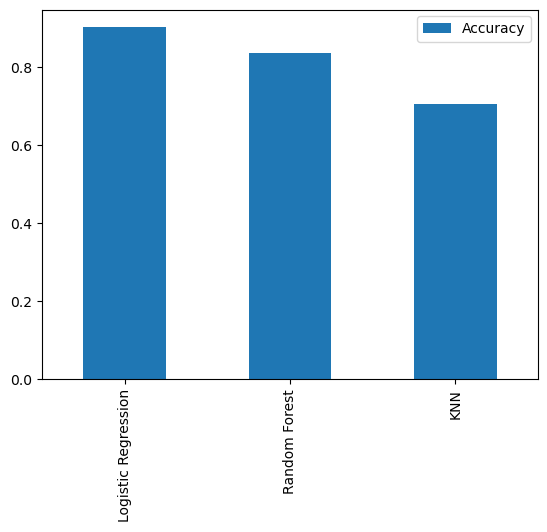

In [91]:
model_compares = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compares.T.plot.bar();

# Next Appprocah:

Now we`ve got a baseline model... and we know a model`s first predictions aren`t always what we should based our next steps off.
What should do?

Let`s look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)


## Hyperparameter Tuning

In [92]:
# Let's tune KNN

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors

neighbors = range(1,21)

#Setup Knn

knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # update the train scores
    train_scores.append(knn.score(X_train, y_train))
    #update the test_scores
    test_scores.append(knn.score(X_test, y_test))

In [93]:
train_scores

[1.0,
 0.7975206611570248,
 0.7892561983471075,
 0.7768595041322314,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7148760330578512,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6900826446280992,
 0.7148760330578512,
 0.7148760330578512,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925]

In [94]:
test_scores

[0.6229508196721312,
 0.5901639344262295,
 0.7049180327868853,
 0.5737704918032787,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344]

Maximum KNN Score on the test data: 70.49%


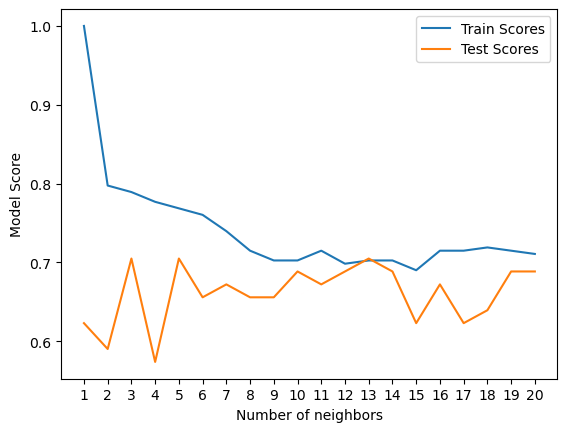

In [96]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RadomizedSearchCV

We`re going to tune:
* LogisticRegression()
* RandomForestClassifier()
* ... Using RandomizedSearchCV





In [113]:
# Create a HyperParameter grid For LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a HyperParameter Grid For RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

Now we`ve got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV....

In [114]:
# Tune LogisticRegression
np.random.seed(40)


# Setup Random Hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20, 
                                verbose = True)


# Fit random Hyperparameter search model for Logitstic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [115]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [116]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

Now we`ve tuned LogisticRegression Let`s do the same for RandomForestClassifier

In [125]:
# Setup Random Seed
np.random.seed(40)

# setup random hyperparameter search for randomized search cv
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
# Fit the hyperparameter search model for RandomForestClassifer()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [126]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 11,
 'max_depth': 10}

In [127]:
rs_rf.score(X_test, y_test)

0.8360655737704918

# HyperParameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores sp far, we`ll try and improve them again using GridSearchCV...

In [129]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fir grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [130]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [133]:
gs_log_reg.score(X_test, y_test)

0.9016393442622951

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Preicion
* Recall
* F1

... and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predictions.

In [136]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

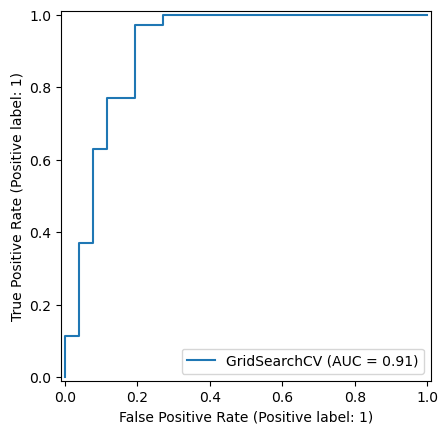

In [140]:
# Plot ROC Curve and Calculate AUC Metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [141]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[21  5]
 [ 1 34]]


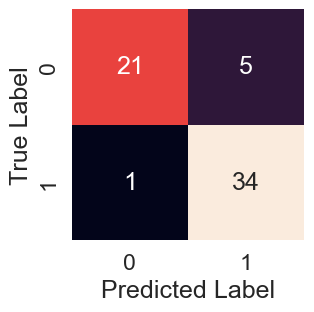

In [144]:
sns.set(font_scale=1.5)

def plot_con_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize= (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = False)
    plt.xlabel("Predicted Label") # Predicitons go on X-axis
    plt.ylabel("True Label")
plot_con_mat(y_test, y_preds)

Now we`ve got a ROC Curve, an AUC metric and a confusion matrix, lets get a classification report as well as  cross-validated precision, recall and f-1 score.

In [146]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



### Calculate evaluation metrics using cross-validation

we're going to calcultae precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`.

In [148]:
# Check best hyperparamets
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [149]:
# Create a new classifier with best parameters
clf = LogisticRegression( C = 0.1082636733874054,
                         solver = "liblinear")

In [154]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [159]:
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [155]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.84848485, 0.85714286, 0.725     ])

In [161]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8182683982683983

In [156]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv = 5,
                            scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [162]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [158]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.84848485, 0.88235294, 0.79452055])

In [163]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964055

<Axes: title={'center': 'Cross-Validated Metrics'}>

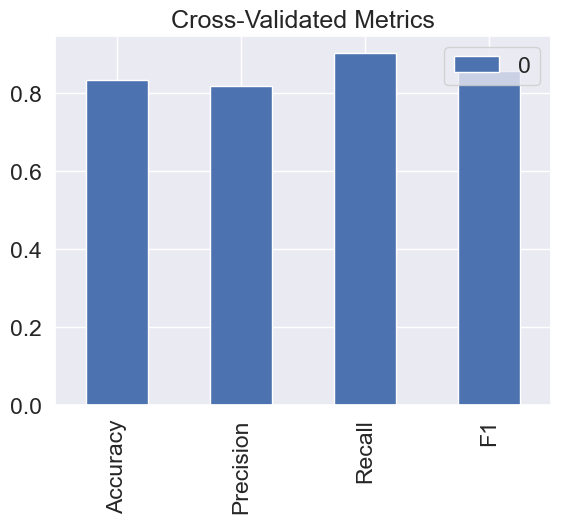

In [164]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title = "Cross-Validated Metrics")

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for '(Model Name)' feature importance.

Let's find the features importance for our LogisticRegression model...

In [168]:
# Fit an instance of LogisticRegression

clf = LogisticRegression( C = 0.1082636733874054,
                         solver = "liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [169]:
# Check coef_
clf.coef_

array([[ 0.00567294, -0.60072207,  0.66980091, -0.02126791, -0.00160921,
        -0.06916533,  0.27208603,  0.02893199, -0.3358502 , -0.40005284,
         0.23081045, -0.54819608, -0.50523544]])

In [171]:
# Match coed's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0056729371817221055,
 'sex': -0.600722072420214,
 'cp': 0.6698009068827311,
 'trestbps': -0.021267914782708744,
 'chol': -0.0016092123032756113,
 'fbs': -0.06916533146772998,
 'restecg': 0.2720860339575319,
 'thalach': 0.028931992679160953,
 'exang': -0.3358502032347626,
 'oldpeak': -0.4000528405465446,
 'slope': 0.23081045393344712,
 'ca': -0.5481960806115508,
 'thal': -0.505235437480534}

<Axes: title={'center': 'Feature Importance'}>

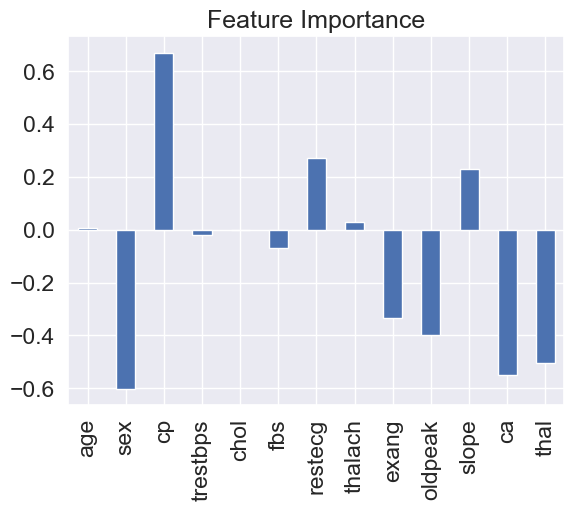

In [174]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False)

In [178]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Slope - the slope of the peak exercise ST segment

* 0. Upsloping: better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change(typical healthy heart)
* 2: Downslopins: signs of unhealthy heart.

# 6. Experimentation

If you haven`t hit your evalutaion metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like catBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?